<a href="https://colab.research.google.com/github/Sujal261/journey/blob/main/my_first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [4]:
#setting up device agnostic code
device ="cuda" if torch.cuda.is_available() else "cpu"
print(f"Device:{device}")

Device:cuda


In [21]:
#Preparing data for model
weight = 0.5
bias = 0.6

start = 0
end = 1
step = 0.02
X=torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X+bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.6000],
         [0.6100],
         [0.6200],
         [0.6300],
         [0.6400],
         [0.6500],
         [0.6600],
         [0.6700],
         [0.6800],
         [0.6900]]))

In [33]:
#spliting the data for training
train_split=int(len(X)*0.8)
X_train, y_train  = X[:train_split], y[:train_split]
X_test, y_test  = X[train_split:], y[train_split:]
X_test, y_test
X_train, y_train


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.6000],
         [0.6100],
         [0.6200],
         [0.6300],
         [0.6400],
         [0.6500],
         [0.6600],
         [0.6700],
         [0.6800],
         [0.6900],
         [0.7000],
         [0.7100],
         [

In [34]:
#plottign the data to visualize
def plot_predictions(train_data=X_train,
                     train_label = y_train,
                     test_data= X_test,
                     test_label = y_test,
                     predictions = None):
  plt.figure(figsize=(10,4))
  plt.scatter(train_data, train_label,c="b", label="training data")
  plt.scatter(test_data, test_label,c="r", label="testing  data")
  if predictions is not None:
    plt.scatter(test_data, predictions,c="g", label="training data")

  plt.legend()

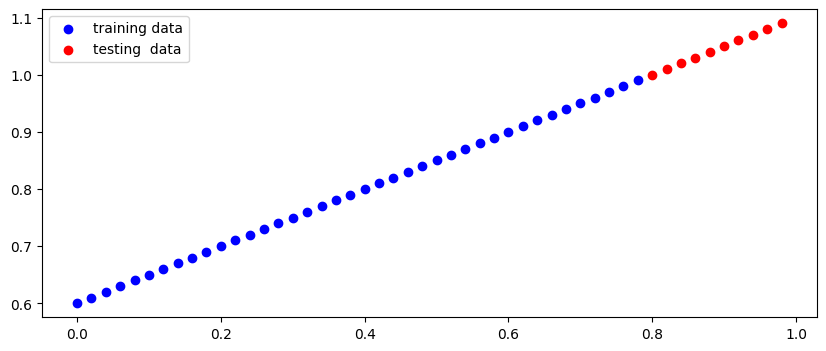

In [35]:
plot_predictions()

In [47]:
#preparing the model
class RegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features =1, out_features =1)

  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = RegressionModel()
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [48]:
#converting everything to gpu
model_1=model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

In [49]:
#setting up the loss fnction and optimizer for training
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [43]:
print(y_train.type())

torch.cuda.FloatTensor


In [56]:
#training the model
torch.manual_seed(42)
epochs = 300
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)
for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss_1 = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss_1.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    y_preds = model_1(X_test)
    test_loss=loss_fn(y_preds, y_test)

  if epoch%10==0:
    print(f"Loss:{loss_1}, Test loss ={test_loss}")


Loss:0.003982982132583857, Test loss =0.005033731460571289
Loss:0.003982982132583857, Test loss =0.005033731460571289
Loss:0.003982982132583857, Test loss =0.005033731460571289
Loss:0.003982982132583857, Test loss =0.005033731460571289
Loss:0.003982982132583857, Test loss =0.005033731460571289
Loss:0.003982982132583857, Test loss =0.005033731460571289
Loss:0.003982982132583857, Test loss =0.005033731460571289
Loss:0.003982982132583857, Test loss =0.005033731460571289
Loss:0.003982982132583857, Test loss =0.005033731460571289
Loss:0.003982982132583857, Test loss =0.005033731460571289
Loss:0.003982982132583857, Test loss =0.005033731460571289
Loss:0.003982982132583857, Test loss =0.005033731460571289
Loss:0.003982982132583857, Test loss =0.005033731460571289
Loss:0.003982982132583857, Test loss =0.005033731460571289
Loss:0.003982982132583857, Test loss =0.005033731460571289
Loss:0.003982982132583857, Test loss =0.005033731460571289
Loss:0.003982982132583857, Test loss =0.0050337314605712

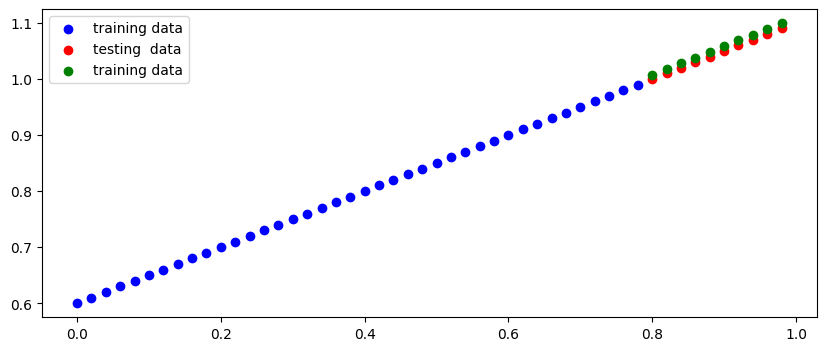

In [57]:
  plot_predictions(predictions=y_preds.cpu())

In [53]:
model_1.parameters()

<generator object Module.parameters at 0x7a70c6419fc0>

In [58]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5089]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.6005], device='cuda:0'))])

In [55]:
from pathlib import Path
model_path =Path("models")
model_path.mkdir(parents=True, exist_ok=True)
model_name="my_first_model.pth"
model_saved_path= model_path/ model_name

print(f"Saving path to : {model_saved_path}")
torch.save(obj = model_1.state_dict(), f=model_saved_path)

Saving path to : models/my_first_model.pth
